LB06 - AoL Machine Learning
- Annisa Indriani
- Cyntia Angelica
- Kayla Nur Khosyatillah Sudza

Womens Clothing E-Commerce Reviews

Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read file and load dataset

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Dataset ini terdiri dari 23.486 baris dan 10 variabel. Variabel target dalam dataset ini adalah rating produk.

Berikut adalah penjelasan untuk masing-masing variabel:
1. Clothing ID            : ID unik untuk setiap produk pakaian
2. Age                    : Usia dari masing-masing reviewer
3. Title                  : Judul dari review yang diberikan oleh reviewer
4. Review text            : Deskripsi dari review yang diberikan oleh reviewer
5. Rating                 : Rating produk yang diberikan oleh reviewer, dengan skala dari 0 (paling buruk) hingga 5 (paling bagus)
6. Recommended IND        : Keputusan apakah reviewer merekomendasikan produk tersebut atau tidak, dengan skala 0 (tidak direkomendasikan) dan 1 (direkomendasikan)
7. Positive feedback count: jumlah feedback positif dari customer lain terhadap review tersebut
8. Division name          : Nama divisi di mana produk tersebut termasuk
9. Department name        : Nama departemen di mana produk tersebut termasuk
10. Class name            : Kelas atau kategori produk tersebut

In [3]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [4]:
data["Division Name"].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [5]:
data["Department Name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [6]:
data["Class Name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [7]:
data["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

Pada dataset berikut, terlihat bahwa distribusi dari variabel target tidak merata. Rating 5 memiliki persentase sekitar 55% sedangkan rating 1 hanya memiliki persentase sekitar 3,6%. Hal tersebut menunjukkan bahwa dataset tersebut mengalami ketidakseimbangan (imbalanced).

Data Cleaning

In [8]:
data_clean = data.copy()
data_clean

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Drop the unwanted column

In [9]:
data_clean = data_clean.drop(["Unnamed: 0", "Clothing ID", "Title", "Review Text"], axis = 1)
data_clean.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


Kolom "Clothing ID" merupakan sebuah ID unik yang tidak terkait dengan rating secara langsung, sehingga dihapus karena dianggap kurang relevan dalam memprediksi rating. Sementara itu, kolom "Title" dan "Review Text" memang memiliki relevansi yang cukup tinggi terhadap rating, tetapi kedua kolom tersebut mengandung teks. Jika tetap melanjutkan dengan kedua kolom tersebut maka memerlukan pemrosesan tambahan, sehingga kedua kolom tersebut dihapus untuk mengurangi kompleksitas pemrosesan data serta menghindari penggunaan sumber daya komputasi yang berlebihan.

Rename the column

In [10]:
data_clean.rename(columns = {"Recommended IND": "Recommended", "Division Name": "Division", "Department Name": "Department", "Class Name": "Class"}, inplace = True)
data_clean.head()

,Age,Rating,Recommended,Positive Feedback Count,Division,Department,Class
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


Kolom "Recommended ID", "Division Name", dan "Department Name" diubah untuk memudahkan penggunaaan data.

In [11]:
data_clean["Division"] = data_clean["Division"].replace("Initmates", "Intimates")

Kolom "Division" yang memiliki nilai "Initmates" diganti menjadi "Intimates" karena diduga terjadi kesalahan pengejaan sehingga perlu dilakukan perbaikan.

Check missing value

In [12]:
print(data_clean.isna().sum())

Age                         0
Rating                      0
Recommended                 0
Positive Feedback Count     0
Division                   14
Department                 14
Class                      14
dtype: int64


Kolom "Division", "Department", dan "Class" pada dataset tersebut memiliki nilai yang hilang sebanyak 14 baris.

Handle missing value

In [13]:
data_clean.dropna(subset = ["Division", "Department", "Class"], inplace = True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23472 non-null  int64 
 1   Rating                   23472 non-null  int64 
 2   Recommended              23472 non-null  int64 
 3   Positive Feedback Count  23472 non-null  int64 
 4   Division                 23472 non-null  object
 5   Department               23472 non-null  object
 6   Class                    23472 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


Dengan mempertimbangkan jumlah missing value pada kolom "Division", "Department", dan "Class" yang berada di bawah 0,1% dari jumlah baris dataset, maka baris yang memiliki missing value pada ketiga kolom tersebut akan dihapus.

Data Exploration

Distrubution of Age

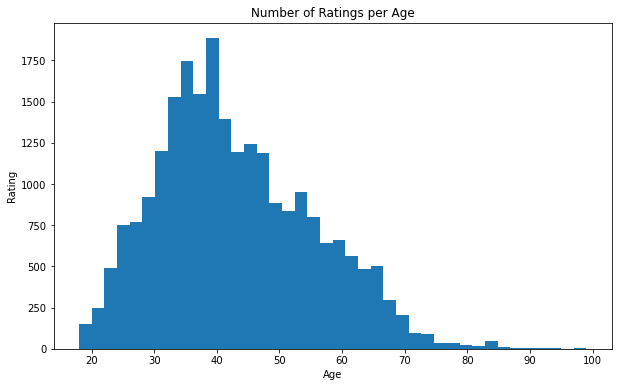

In [29]:
plt.figure(figsize = (10, 6))
plt.hist(data_clean["Age"], bins = 40)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Number of Ratings per Age")
plt.show()

Pada histogram tersebut, terlihat bahwa jumlah review yang diberikan oleh customer berusia antara 20 hingga 40 tahun meningkat secara signifikan. Hal ini menunjukkan bahwa kelompok usia ini secara aktif berpartisipasi dalam memberikan review. Selain itu, terlihat bahwa jumlah review yang diberikan oleh customer berusia 40 tahun ke atas cenderung menurun.

Distrubution of Ratings

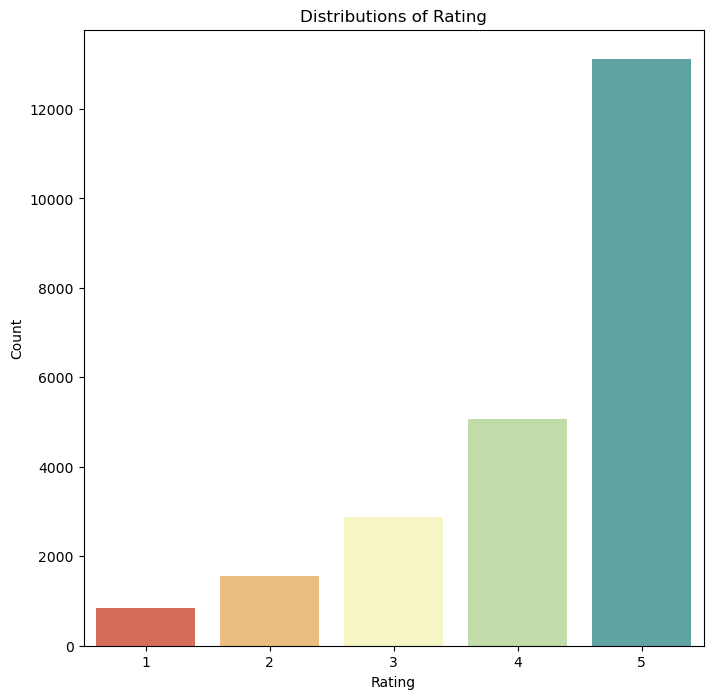

In [14]:
plt.figure(figsize = (8, 8))
plt.title("Distributions of Rating")
sns.countplot(x = "Rating", data = data_clean, palette = "Spectral")
plt.ylabel("Count")
plt.show()

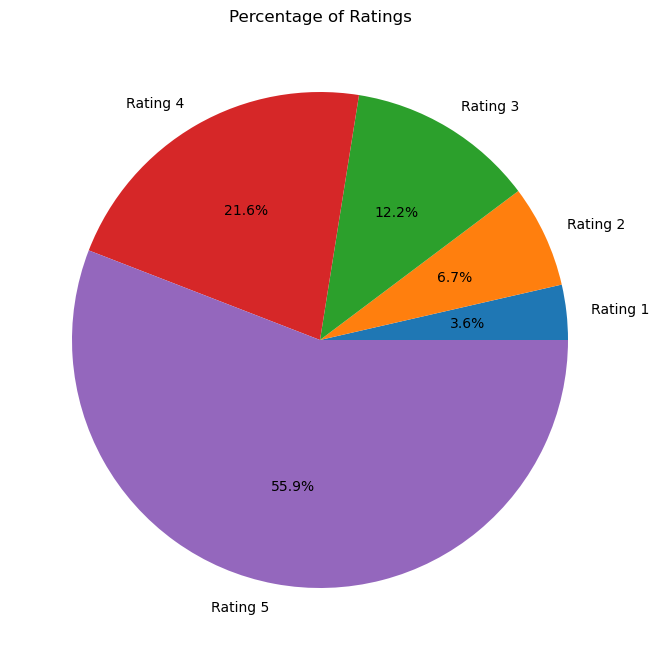

In [15]:
rating_1 = data_clean[data_clean["Rating"] == 1]
rating_2 = data_clean[data_clean["Rating"] == 2]
rating_3 = data_clean[data_clean["Rating"] == 3]
rating_4 = data_clean[data_clean["Rating"] == 4]
rating_5 = data_clean[data_clean["Rating"] == 5]
rat_1 = (len(rating_1)/len(data_clean)) * 100
rat_2 = (len(rating_2)/len(data_clean)) * 100
rat_3 = (len(rating_3)/len(data_clean)) * 100
rat_4 = (len(rating_4)/len(data_clean)) * 100
rat_5 = (len(rating_5)/len(data_clean)) * 100
y = np.array([rat_1, rat_2, rat_3, rat_4, rat_5])
plt.figure(figsize = (8,10))
mylabels = ["Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5"]
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.title('Percentage of Ratings')
plt.show()

Dari count plot tersebut, terlihat bahwa distribusi rating tidak merata secara keseluruhan. Terlihat bahwa terdapat jarak yang signifikan antara beberapa rating tertentu, terutama pada rating "1" dan "5". Hal ini menunjukkan adanya perbedaan yang mencolok antara review dengan rating sangat rendah dan review dengan rating sangat tinggi.

Rating vs Age

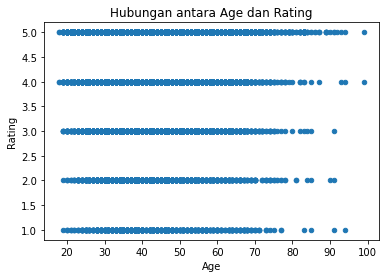

In [31]:
data_clean.plot.scatter(x = "Age", y = "Rating")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Hubungan antara Age dan Rating")
plt.show()

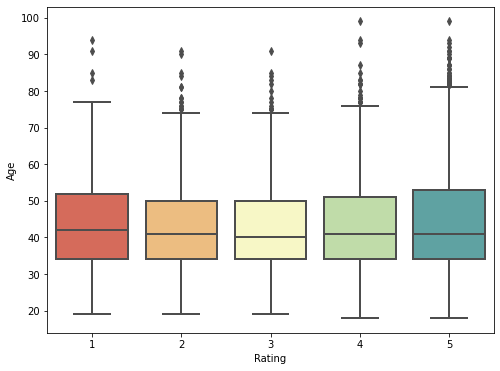

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x = data_clean["Rating"], y = data_clean["Age"], linewidth = 2, palette = "Spectral")
plt.show()

Dari kedua plot diatas, terlihat bahwa sebaran titik cenderung merata di sepanjang rentang usia, dimana terdapat variasi rating di setiap rentang usia. Selain itu, tidak terlihat adanya tren yang jelas antara usia dan rating, yang menunjukkan bahwa tidak ada hubungan yang signifikan antara usia dan rating.

Rating vs Recommended

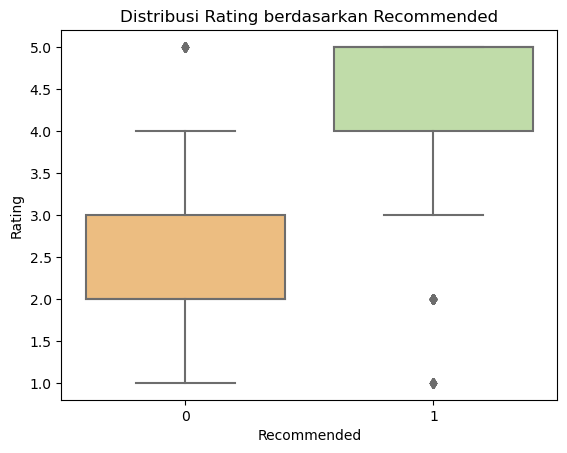

In [16]:
sns.boxplot(x = "Recommended", y = "Rating", data = data_clean, palette = 'Spectral')
plt.xlabel("Recommended")
plt.ylabel("Rating")
plt.title("Distribusi Rating berdasarkan Recommended")
plt.show()

Dari box plot tersebut, terlihat bahwa produk yang direkomendasikan cenderung memiliki rating yang lebih tinggi daripada produk yang tidak direkomendasikan. Selain itu, variasi rating pada produk yang direkomendasikan cenderung lebih kecil, yang menunjukkan bahwa adanya hubungan yang signifikan antara variabel recommended dan rating.

Rating vs Positive Feedback Count

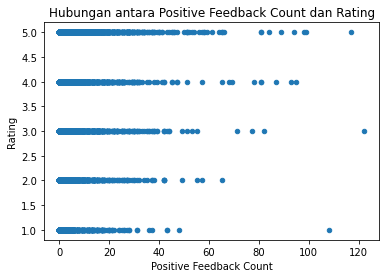

In [34]:
data_clean.plot.scatter(x = "Positive Feedback Count", y = "Rating")
plt.xlabel("Positive Feedback Count")
plt.ylabel("Rating")
plt.title("Hubungan antara Positive Feedback Count dan Rating")
plt.show()

Dari scatter plot tersebut, terlihat bahwa sebaran titik cenderung acak di sepanjang sumbu x dan y, dan tidak ada tren yang terlihat antara kedua variabel tersebut. Hal ini menunjukkan bahwa tidak ada hubungan yang signifikan antara jumlah positive feedback dan rating.

Recommended vs Division

c:\Users\cynti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


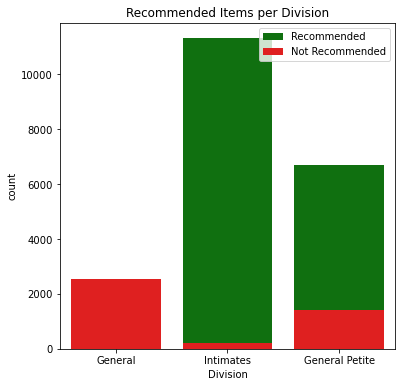

In [35]:
recommended = data_clean[data_clean["Recommended"] == 1]
not_recommended = data_clean[data_clean["Recommended"] == 0]
fig = plt.figure(figsize = (6, 6))
ax1 = sns.countplot(recommended["Division"], color = "green", label = "Recommended")
ax1 = sns.countplot(not_recommended["Division"], color = "red", label = "Not Recommended")
ax1 = plt.title("Recommended Items per Division")
ax1 = plt.legend()

Dari count plot tersebut, terlihat bahwa terdapat perbedaan yang signifikan dalam jumlah produk yang direkomendasikan di antara divisi-divisi dalam dataset.

Divisi "Intimates" dan "General Petite" menunjukkan jumlah produk yang paling banyak direkomendasikan, yang dapat dilihat dari tingginya bar pada plot untuk kedua divisi tersebut. Hal ini menunjukkan bahwa produk-produk dalam divisi "Intimates" dan "General Petite" cenderung mendapatkan review yang positif dan rekomendasi dari customer.

Sedangkan, pada divisi "General", terlihat bahwa tidak ada produk yang direkomendasikan. Hal ini berarti produk dalam divisi tersebut tidak menerima review yang cukup baik.

Recommended vs Department

c:\Users\cynti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


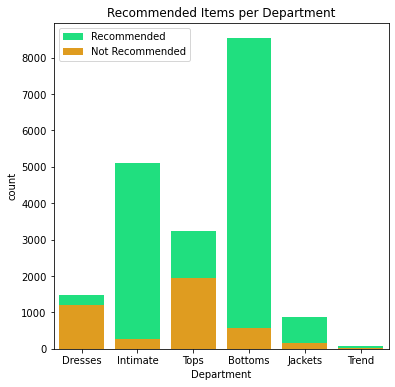

In [36]:
fig = plt.figure(figsize = (6, 6))
ax2 = sns.countplot(recommended["Department"], color = "springgreen", label = "Recommended")
ax2 = sns.countplot(not_recommended["Department"], color = "orange", label = "Not Recommended")
ax2 = plt.title("Recommended Items per Department")
ax2 = plt.legend()

Dari count plot tersebut, terlihat bahwa beberapa department memiliki jumlah customer yang merekomendasikan produk dengan angka yang lebih tinggi, seperti department "Intimate", "Bottoms", "Jackets", dan "Trends". 

Namun, pada department "Dresses" dan "Tops", terlihat bahwa jumlah customer yang merekomendasikan produk lebih sedikit dibandingkan dengan department lainnya. Hal ini menunjukkan bahwa produk-produk dari kedua department tersebut cenderung mendapatkan rekomendasi yang lebih rendah dari customer.

Recommended vs Class

c:\Users\cynti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


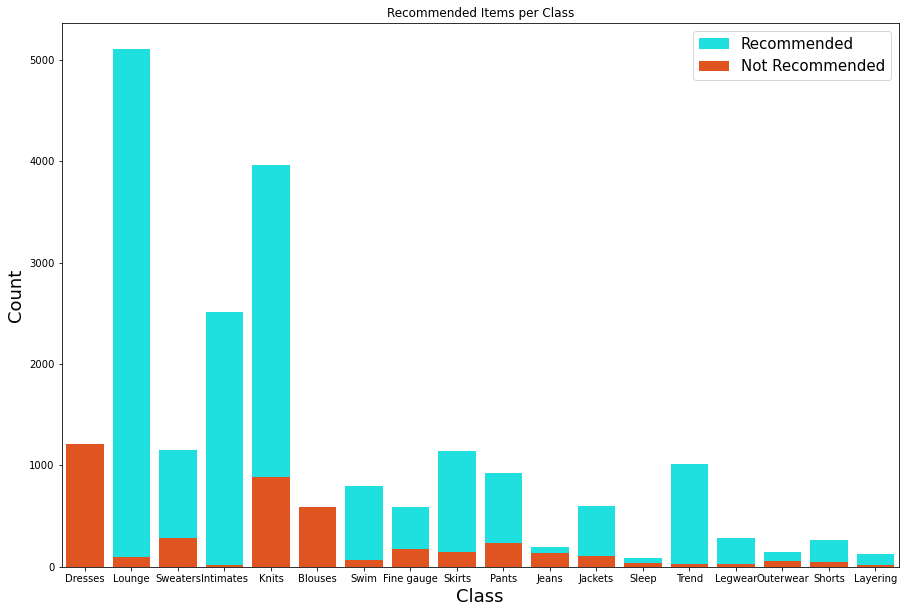

In [37]:
fig = plt.figure(figsize = (15, 10))
ax3 = sns.countplot(recommended["Class"], color = "cyan", label = "Recommended")
ax3 = sns.countplot(not_recommended["Class"], color = "orangered", label = "Not Recommended")
ax3 = plt.title("Recommended Items per Class")
ax3 = plt.legend(prop = { "size": 15 })
plt.xlabel("Class", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.show()

Pada count plot tersebut, terlihat bahwa setiap kelas secara umum mendapatkan rekomendasi yang positif dari customer. Namun, terdapat beberapa kelas, seperti "Dresses", "Blouses", dan "Jeans", yang memiliki jumlah item yang kurang direkomendasikan oleh customer. Hal ini menunjukkan adanya perbedaan dalam preferensi atau pengalaman customer terkait produk dalam class tersebut yang bisa disebabkan oleh  beberapa faktor sehingga kurang direkomendasikan.

Rating vs Division vs Recommended

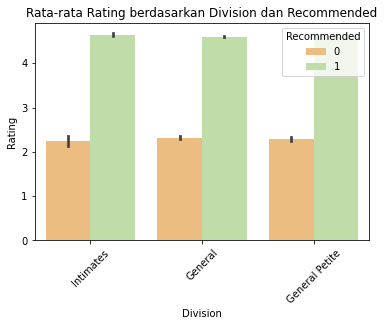

In [38]:
sns.barplot(x = "Division", y = "Rating", hue = "Recommended", data = data_clean, palette = 'Spectral')
plt.xlabel("Division")
plt.ylabel("Rating")
plt.title("Rata-rata Rating berdasarkan Division dan Recommended")
plt.xticks(rotation = 45)
plt.legend(title = "Recommended", loc = "upper right")
plt.show()

Dari bar plot tersebut, terlihat pola yang menunjukkan bahwa produk yang memiliki rating rendah cenderung tidak direkomendasikan oleh customer. Hal ini berarti terdapat hubungan yang signifikan antara rating dengan rekomendasi.

Rating vs Department Name

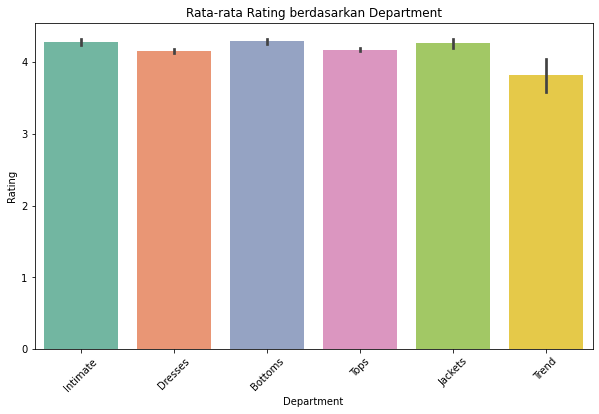

In [39]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "Department", y = "Rating", data = data_clean, palette = 'Set2')
plt.xlabel("Department")
plt.ylabel("Rating")
plt.title("Rata-rata Rating berdasarkan Department")
plt.xticks(rotation = 45)
plt.show()

Dari bar plot tersebut, terlihat bahwa rata-rata rating pada setiap department memiliki nilai yang sama, kecuali pada department "Trend". Artinya, produk dalam department tersebut secara keseluruhan memperoleh penilaian yang sama dari customer.

Coefficient Corelation

<AxesSubplot:title={'center':'Koefisien Korelasi'}>

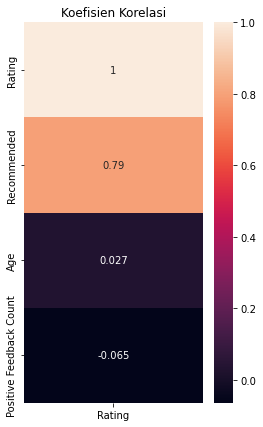

In [40]:
data_corr = data_clean.corr()[["Rating"]].sort_values(by = ["Rating"], ascending = False)
plt.figure(figsize = (4,7))
plt.title("Koefisien Korelasi")
sns.heatmap(data_corr, annot = True)

Dari hasil tersebut, terlihat bahwa kolom "Recommended" memiliki korelasi yang kuat terhadap "Rating". Hal ini menunjukkan bahwa produk yang direkomendasikan oleh pelanggan cenderung memiliki rating yang tinggi. 

Sementara itu, kolom "Age" memiliki nilai koefisien korelasi mendekati 0, yang menunjukkan bahwa usia tidak memiliki pengaruh yang signifikan terhadap rating. 

Pada kolom "Positive Feedback Count", meskipun korelasinya lemah, terdapat indikasi bahwa semakin banyak umpan balik positif yang diberikan, kemungkinan produk mendapatkan rating yang tinggi menjadi lebih rendah. 

Meskipun begitu, terlepas dari nilai koefisien korelasi, ketiga variabel tersebut tetap dimasukkan ke dalam model karena keterbatasan variabel yang tersedia dalam dataset.

Feature Engineering

In [18]:
data_eng = data_clean.copy()
data_eng

,Age,Rating,Recommended,Positive Feedback Count,Division,Department,Class
0,33,4,1,0,Intimates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...
23481,34,5,1,0,General Petite,Dresses,Dresses
23482,48,3,1,0,General Petite,Tops,Knits
23483,31,3,0,1,General Petite,Dresses,Dresses
23484,28,3,1,2,General,Dresses,Dresses


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
onehot_encoder = OneHotEncoder()
cat_nominal = onehot_encoder.fit_transform(data_eng[["Division"]])
div_onehot = pd.DataFrame(cat_nominal.toarray())
div_onehot

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
23467,0.0,1.0,0.0
23468,0.0,1.0,0.0
23469,0.0,1.0,0.0
23470,1.0,0.0,0.0


In [21]:
cat_nominal = onehot_encoder.fit_transform(data_eng[["Department"]])
dept_onehot = pd.DataFrame(cat_nominal.toarray())
dept_onehot

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
23467,0.0,1.0,0.0,0.0,0.0,0.0
23468,0.0,0.0,0.0,0.0,1.0,0.0
23469,0.0,1.0,0.0,0.0,0.0,0.0
23470,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
cat_nominal = onehot_encoder.fit_transform(data_eng[["Class"]])
class_onehot = pd.DataFrame(cat_nominal.toarray())
class_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data_preprocess = pd.concat([data_eng, div_onehot, dept_onehot, class_onehot], axis = 1)
data_preprocess.drop(["Division", "Department", "Class"], axis = 1, inplace = True)
data_preprocess.dropna(inplace = True)
data_preprocess.reset_index(drop = True)
data_preprocess

,Age,Rating,Recommended,Positive Feedback Count,0,1,2,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,33.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,5.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,5.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23467,60.0,5.0,1.0,23.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23468,35.0,5.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23469,50.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23470,39.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Untuk mengubah nilai pada variabel kategorikal menjadi numerik, kami memilih pendekatan one-hot encoder karena tidak ada tingkatan yang dapat diurutkan pada nilai-nilai dalam kategori tersebut.

In [24]:
data_preprocess.columns = data_preprocess.columns.astype(str)

Split the data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data_preprocess.drop(["Rating"], axis = 1), data_preprocess["Rating"], test_size = 0.3, random_state = 99)

Model Training using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model = LogisticRegression(C = 1, random_state = 42, solver = 'liblinear')
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_train)
print("Confusion matrix using Logistic Regression") 
print(confusion_matrix(y_train, lr_pred))
print()
print(classification_report(y_train, lr_pred))

Confusion matrix using Logistic Regression
[[   1   39  525    0   11]
 [   0   84  935    0   60]
 [   0   66 1124    0  837]
 [   0    9  110    0 3411]
 [   0    4   15    0 9189]]

              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00       576
         2.0       0.42      0.08      0.13      1079
         3.0       0.41      0.55      0.47      2027
         4.0       0.00      0.00      0.00      3530
         5.0       0.68      1.00      0.81      9208

    accuracy                           0.63     16420
   macro avg       0.50      0.33      0.28     16420
weighted avg       0.50      0.63      0.52     16420



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Training using SVM

In [30]:
from sklearn.svm import SVC

In [86]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_train)
print("Confusion matrix using SVM") 
print(confusion_matrix(y_train, svm_pred))
print()
print(classification_report(y_train, svm_pred))

Confusion matrix using SVM
[[   0    0  389    0  187]
 [   0    0  751    0  328]
 [   0    0  863    0 1164]
 [   0    0   83    0 3447]
 [   0    0    8    0 9200]]

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       576
         2.0       0.00      0.00      0.00      1079
         3.0       0.41      0.43      0.42      2027
         4.0       0.00      0.00      0.00      3530
         5.0       0.64      1.00      0.78      9208

    accuracy                           0.61     16420
   macro avg       0.21      0.28      0.24     16420
weighted avg       0.41      0.61      0.49     16420



c:\Users\cynti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Training using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(np.array(x_train), y_train)
rf_pred = rf_model.predict(np.array(x_train))
print("Confusion matrix using Random Forest")
print(confusion_matrix(y_train, rf_pred))
print("")
print(classification_report(y_train, rf_pred))

Confusion matrix using Random Forest
[[ 417   56   92    4    7]
 [  36  860  140    9   34]
 [  35   83 1349   67  493]
 [  11   19   41 1440 2019]
 [   0    3   33  330 8842]]

              precision    recall  f1-score   support

         1.0       0.84      0.72      0.78       576
         2.0       0.84      0.80      0.82      1079
         3.0       0.82      0.67      0.73      2027
         4.0       0.78      0.41      0.54      3530
         5.0       0.78      0.96      0.86      9208

    accuracy                           0.79     16420
   macro avg       0.81      0.71      0.74     16420
weighted avg       0.79      0.79      0.77     16420



Model Training using Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
prediction = DT_model.predict(x_train)
print("Confusion matrix using Random Forest")
print(confusion_matrix(y_train, rf_pred))
print("")
print(classification_report(y_train, rf_pred))

Confusion matrix using Random Forest
[[ 417   56   92    4    7]
 [  36  860  140    9   34]
 [  35   83 1349   67  493]
 [  11   19   41 1440 2019]
 [   0    3   33  330 8842]]

              precision    recall  f1-score   support

         1.0       0.84      0.72      0.78       576
         2.0       0.84      0.80      0.82      1079
         3.0       0.82      0.67      0.73      2027
         4.0       0.78      0.41      0.54      3530
         5.0       0.78      0.96      0.86      9208

    accuracy                           0.79     16420
   macro avg       0.81      0.71      0.74     16420
weighted avg       0.79      0.79      0.77     16420



Model Training using Ensemble Model Voting

In [36]:
from sklearn.ensemble import VotingClassifier

In [92]:
voting_model = VotingClassifier(estimators = [("LR", lr_model), ("SVM", svm_model), ("RF", rf_model)], voting = "hard")
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_train)
print("Confusion matrix using Ensemble Model Voting")
print(confusion_matrix(y_train, voting_pred))
print("")
print(classification_report(y_train, voting_pred))

Confusion matrix using Ensemble Model Voting
[[ 168   10  387    0   11]
 [  10  280  729    0   60]
 [   9   42 1138    0  838]
 [   1   13  105    0 3411]
 [   0    1    8    0 9199]]

              precision    recall  f1-score   support

         1.0       0.89      0.29      0.44       576
         2.0       0.81      0.26      0.39      1079
         3.0       0.48      0.56      0.52      2027
         4.0       0.00      0.00      0.00      3530
         5.0       0.68      1.00      0.81      9208

    accuracy                           0.66     16420
   macro avg       0.57      0.42      0.43     16420
weighted avg       0.53      0.66      0.56     16420



c:\Users\cynti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Training using Ensemble Model Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier

In [47]:
bagging_model = BaggingClassifier(n_estimators = 100, base_estimator = rf_model, random_state = 99)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_train)
print("Confusion matrix using Ensemble Model Bagging")
print(confusion_matrix(y_train, bagging_pred))
print("")
print(classification_report(y_train, bagging_pred))

c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion matrix using Ensemble Model Bagging
[[ 379   75  111    2    9]
 [  30  852  145    7   45]
 [  22   97 1234   56  618]
 [  11   27   34 1140 2318]
 [   1    4    7  252 8944]]

              precision    recall  f1-score   support

         1.0       0.86      0.66      0.74       576
         2.0       0.81      0.79      0.80      1079
         3.0       0.81      0.61      0.69      2027
         4.0       0.78      0.32      0.46      3530
         5.0       0.75      0.97      0.85      9208

    accuracy                           0.76     16420
   macro avg       0.80      0.67      0.71     16420
weighted avg       0.77      0.76      0.74     16420



Model Training using Ensemble Model Boosting AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
adaboost_model = AdaBoostClassifier(n_estimators = 100, base_estimator = rf_model)
adaboost_model.fit(x_train, y_train)
adaboost_pred = adaboost_model.predict(x_train)
print("Confusion matrix using Ensemble Model Adaboost")
print(confusion_matrix(y_train, adaboost_pred))
print("")
print(classification_report(y_train, adaboost_pred))

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion matrix using Ensemble Model Adaboost
[[ 407   61   99    2    7]
 [  29  867  142    8   33]
 [  27   87 1328   52  533]
 [  12   20   34 1297 2167]
 [   0    3    7  189 9009]]

              precision    recall  f1-score   support

         1.0       0.86      0.71      0.77       576
         2.0       0.84      0.80      0.82      1079
         3.0       0.82      0.66      0.73      2027
         4.0       0.84      0.37      0.51      3530
         5.0       0.77      0.98      0.86      9208

    accuracy                           0.79     16420
   macro avg       0.82      0.70      0.74     16420
weighted avg       0.80      0.79      0.76     16420



Model Training using Ensemble Model Boosting GradientBoosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_train)
print("Confusion matrix using Ensemble Model GradientBoosting")
print(confusion_matrix(y_train, gb_pred))
print("")
print(classification_report(y_train, gb_pred))

Confusion matrix using Ensemble Model GradientBoosting
[[  49  123  393    0   11]
 [  15  384  620    0   60]
 [  18  225  952    0  832]
 [   2   36   79   25 3388]
 [   0    3   15    2 9188]]

              precision    recall  f1-score   support

         1.0       0.58      0.09      0.15       576
         2.0       0.50      0.36      0.42      1079
         3.0       0.46      0.47      0.47      2027
         4.0       0.93      0.01      0.01      3530
         5.0       0.68      1.00      0.81      9208

    accuracy                           0.65     16420
   macro avg       0.63      0.38      0.37     16420
weighted avg       0.69      0.65      0.55     16420



Dari hasil training model di atas, berikut hasil akurasi yang diperoleh dari tiap model:
1. Logistic regression model : 0.63
2. SVM model : 0.61
3. Random forest model :  0.79
4. Decision tree model: 0.79
5. Ensemble model voting : 0.66
6. Ensemble model bagging : 0.76
7. Ensemble model adaboost : 0.79
8. Ensemble model gradientboosting : 0.65

Model yang menggunakan Random Forest, Decision Tree dan Adaboost memiliki tingkat akurasi yang sama, yaitu sebesar 0.79. Namun, pada kasus imbalanced dataset, selain akurasi, f1 score dan recall juga perlu diperhatikan untuk memastikan bahwa model mampu mengidentifikasi dengan baik kelas yang penting. Pada kasus ini, rata-rata f1 score dan recall untuk kelas target 1 pada model Decision Tree lebih besar daripada kedua metode lain sehingga model tersebut bisa dipilih sebagai model yang cocok untuk dataset. Namun, pada kali ini kami akan melanjutkan hyperparameter tuning dan model evaluation menggunakan ketiga metode tersebut untuk dibandingkan metode mana yang memberikan hasil terbaik.

Hyperparameter Tuning Random Forest

In [70]:
from sklearn.model_selection import GridSearchCV

In [113]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'],  
    'bootstrap': [True, False]  
}

grid_search = GridSearchCV(rf_model, param_grid, cv = 5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params) 

c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


Model Training using Random Forest with Best Parameters

In [40]:
rf_best_model2 = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 300)
rf_best_model2.fit(x_train, y_train)
rf_best_model_pred2 = rf_best_model2.predict(x_train)
print("Confusion matrix using best parameters random forest")
print(confusion_matrix(y_train, rf_best_model_pred2))
print()
print(classification_report(y_train, rf_best_model_pred2))

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Confusion matrix using best parameters random forest
[[  40  102  423    0   11]
 [   6  422  591    0   60]
 [   3   79 1108    1  836]
 [   3   26   90    4 3407]
 [   0    6   13    0 9189]]

              precision    recall  f1-score   support

         1.0       0.77      0.07      0.13       576
         2.0       0.66      0.39      0.49      1079
         3.0       0.50      0.55      0.52      2027
         4.0       0.80      0.00      0.00      3530
         5.0       0.68      1.00      0.81      9208

    accuracy                           0.66     16420
   macro avg       0.68      0.40      0.39     16420
weighted avg       0.69      0.66      0.56     16420



Setelah model Random Forest ditrain menggunakan parameter terbaik yang telah di-tuning, ternyata hasil akurasinya menurun. Oleh karena itu, kami mencoba melakukan training dengan parameter yang berbeda dalam upaya meningkatkan akurasi model.

In [48]:
rf_best_model = RandomForestClassifier(n_estimators = 100, max_features = "sqrt", bootstrap = True)
rf_best_model.fit(x_train, y_train)
rf_best_model_pred = rf_best_model.predict(x_train)
print("Confusion matrix using best parameters random forest")
print(confusion_matrix(y_train, rf_best_model_pred))
print()
print(classification_report(y_train, rf_best_model_pred))

Confusion matrix using best parameters random forest
[[ 419   56   90    4    7]
 [  38  862  135   12   32]
 [  39   86 1336   63  503]
 [   9   17   42 1436 2026]
 [   0    3   24  326 8855]]

              precision    recall  f1-score   support

         1.0       0.83      0.73      0.78       576
         2.0       0.84      0.80      0.82      1079
         3.0       0.82      0.66      0.73      2027
         4.0       0.78      0.41      0.53      3530
         5.0       0.78      0.96      0.86      9208

    accuracy                           0.79     16420
   macro avg       0.81      0.71      0.74     16420
weighted avg       0.79      0.79      0.77     16420



Hyperparameter Tuning Decision Tree

In [98]:
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}

grid_search = GridSearchCV(DT_model, param_grid, cv = 5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params) 

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [44]:
dt_best_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split = 5)
dt_best_model2.fit(x_train, y_train)
dt_best_model2_pred = dt_best_model2.predict(x_train)
print("Confusion matrix using best parameters decision tree")
print(confusion_matrix(y_train, dt_best_model2_pred))
print("Confusion matrix using best parameters decision tree")
print(classification_report(y_train, dt_best_model2_pred))

Confusion matrix using best parameters decision tree
[[  19  161  385    0   11]
 [   8  293  719    1   58]
 [  10  244  940    0  833]
 [   0   36   84    5 3405]
 [   1   12   10    3 9182]]
Confusion matrix using best parameters decision tree
              precision    recall  f1-score   support

         1.0       0.50      0.03      0.06       576
         2.0       0.39      0.27      0.32      1079
         3.0       0.44      0.46      0.45      2027
         4.0       0.56      0.00      0.00      3530
         5.0       0.68      1.00      0.81      9208

    accuracy                           0.64     16420
   macro avg       0.51      0.35      0.33     16420
weighted avg       0.60      0.64      0.53     16420



Setelah model Decision Tree ditrain menggunakan parameter terbaik yang telah di-tuning, ternyata hasil akurasinya menurun. Oleh karena itu, kami mencoba melakukan training dengan parameter yang berbeda dalam upaya meningkatkan akurasi model.

In [45]:
dt_best_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 1)
dt_best_model.fit(x_train, y_train)
dt_best_model_pred = dt_best_model.predict(x_train)
print("Confusion matrix using best parameters decision tree")
print(confusion_matrix(y_train, dt_best_model_pred))
print()
print(classification_report(y_train, dt_best_model_pred))

Confusion matrix using best parameters decision tree
[[ 503   28   40    1    4]
 [  74  901   74    4   26]
 [  92  138 1331   46  420]
 [  16   29   75 1706 1704]
 [   3   10  101  627 8467]]

              precision    recall  f1-score   support

         1.0       0.73      0.87      0.80       576
         2.0       0.81      0.84      0.82      1079
         3.0       0.82      0.66      0.73      2027
         4.0       0.72      0.48      0.58      3530
         5.0       0.80      0.92      0.85      9208

    accuracy                           0.79     16420
   macro avg       0.78      0.75      0.76     16420
weighted avg       0.78      0.79      0.78     16420



Hyperparameter Tuning Adaboost

In [112]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0] 
}

grid_search = GridSearchCV(adaboost_model, param_grid, cv = 5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params) 

c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\cynti\anaconda3\lib\site-p

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}


In [46]:
adaboost_best_model2 = AdaBoostClassifier(n_estimators = 200, learning_rate = 1)
adaboost_best_model2.fit(x_train, y_train)
adaboost_best_model2_pred = adaboost_best_model2.predict(x_train)
print("Confusion matrix using best parameters adaboost")
print(confusion_matrix(y_train, adaboost_best_model2_pred))
print()
print(classification_report(y_train, adaboost_best_model2_pred))

Confusion matrix using best parameters adaboost
[[ 185  207  173    0   11]
 [ 293  416  310    7   53]
 [ 334  426  431  101  735]
 [  36   47   39  375 3033]
 [  10    4   14  969 8211]]

              precision    recall  f1-score   support

         1.0       0.22      0.32      0.26       576
         2.0       0.38      0.39      0.38      1079
         3.0       0.45      0.21      0.29      2027
         4.0       0.26      0.11      0.15      3530
         5.0       0.68      0.89      0.77      9208

    accuracy                           0.59     16420
   macro avg       0.40      0.38      0.37     16420
weighted avg       0.53      0.59      0.54     16420



Setelah model Adaboost ditrain menggunakan parameter terbaik yang telah di-tuning, ternyata hasil akurasinya menurun. Oleh karena itu, kami mencoba melakukan training dengan parameter yang berbeda dalam upaya meningkatkan akurasi model.

In [49]:
adaboost_best_model = AdaBoostClassifier(n_estimators = 100, base_estimator = rf_best_model)
adaboost_best_model.fit(x_train, y_train)
adaboost_best_model_pred = adaboost_best_model.predict(x_train)
print("Confusion matrix using best parameters adaboost")
print(confusion_matrix(y_train, adaboost_best_model_pred))
print()
print(classification_report(y_train, adaboost_best_model_pred))

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion matrix using best parameters adaboost
[[ 408   61   98    2    7]
 [  32  868  139    6   34]
 [  25   90 1328   51  533]
 [  11   23   34 1302 2160]
 [   0    3    7  196 9002]]

              precision    recall  f1-score   support

         1.0       0.86      0.71      0.78       576
         2.0       0.83      0.80      0.82      1079
         3.0       0.83      0.66      0.73      2027
         4.0       0.84      0.37      0.51      3530
         5.0       0.77      0.98      0.86      9208

    accuracy                           0.79     16420
   macro avg       0.82      0.70      0.74     16420
weighted avg       0.80      0.79      0.76     16420



Model Evaluation using Random Forest with Best Parameters

In [60]:
rf_best_model_eval = rf_best_model.predict(x_test)
print("Confusion matrix using best parameters random forest")
print(confusion_matrix(y_test, rf_best_model_eval))
print()
print(classification_report(y_test, rf_best_model_eval))

Confusion matrix using best parameters random forest
[[  44   94  116    5    6]
 [  70  167  208   10   31]
 [  69  165  246   60  300]
 [   8   16   53  175 1293]
 [   0   10   70  505 3317]]

              precision    recall  f1-score   support

         1.0       0.23      0.17      0.19       265
         2.0       0.37      0.34      0.36       486
         3.0       0.35      0.29      0.32       840
         4.0       0.23      0.11      0.15      1545
         5.0       0.67      0.85      0.75      3902

    accuracy                           0.56      7038
   macro avg       0.37      0.35      0.35      7038
weighted avg       0.50      0.56      0.52      7038



In [64]:
rf_model_eval = rf_best_model2.predict(x_test)
print("Confusion matrix using best parameters random forest")
print(confusion_matrix(y_test, rf_model_eval))
print()
print(classification_report(y_test, rf_model_eval))

Confusion matrix using best parameters random forest
[[   5   52  203    0    5]
 [   7  101  344    0   34]
 [   8  112  371    0  349]
 [   0    6   43    0 1496]
 [   0    1    5    1 3895]]

              precision    recall  f1-score   support

         1.0       0.25      0.02      0.04       265
         2.0       0.37      0.21      0.27       486
         3.0       0.38      0.44      0.41       840
         4.0       0.00      0.00      0.00      1545
         5.0       0.67      1.00      0.80      3902

    accuracy                           0.62      7038
   macro avg       0.34      0.33      0.30      7038
weighted avg       0.45      0.62      0.51      7038



Model Evaluation using Decision Tree with Best Parameters

In [59]:
dt_best_model_eval = dt_best_model.predict(x_test)
print("Confusion matrix using best parameters decision tree")
print(confusion_matrix(y_test, dt_best_model_eval))
print(classification_report(y_test, dt_best_model_eval))

Confusion matrix using best parameters decision tree
[[  55  106   92    5    7]
 [ 104  160  176   20   26]
 [ 116  165  213   71  275]
 [  16   24   75  271 1159]
 [   6   26  177  703 2990]]
              precision    recall  f1-score   support

         1.0       0.19      0.21      0.20       265
         2.0       0.33      0.33      0.33       486
         3.0       0.29      0.25      0.27       840
         4.0       0.25      0.18      0.21      1545
         5.0       0.67      0.77      0.72      3902

    accuracy                           0.52      7038
   macro avg       0.35      0.35      0.34      7038
weighted avg       0.49      0.52      0.50      7038



In [65]:
dt_model_eval = dt_best_model2.predict(x_test)
print("Confusion matrix using best parameters decision tree")
print(confusion_matrix(y_test, dt_model_eval))
print(classification_report(y_test, dt_model_eval))

Confusion matrix using best parameters decision tree
[[   3   78  179    0    5]
 [   7  124  321    0   34]
 [   2  130  359    1  348]
 [   0   11   39    0 1495]
 [   0    4    5    1 3892]]
              precision    recall  f1-score   support

         1.0       0.25      0.01      0.02       265
         2.0       0.36      0.26      0.30       486
         3.0       0.40      0.43      0.41       840
         4.0       0.00      0.00      0.00      1545
         5.0       0.67      1.00      0.80      3902

    accuracy                           0.62      7038
   macro avg       0.34      0.34      0.31      7038
weighted avg       0.46      0.62      0.52      7038



Model Evaluation using AdaBoost with Best Parameters

In [61]:
adaboost_best_model_eval = adaboost_best_model.predict(x_test)
print("Confusion matrix using best parameters ada boost")
print(confusion_matrix(y_test, adaboost_best_model_eval))
print()
print(classification_report(y_test, adaboost_best_model_eval))

Confusion matrix using best parameters ada boost
[[  38   93  123    5    6]
 [  69  164  215    6   32]
 [  79  160  244   54  303]
 [   9   15   50  151 1320]
 [   0    9   69  417 3407]]

              precision    recall  f1-score   support

         1.0       0.19      0.14      0.17       265
         2.0       0.37      0.34      0.35       486
         3.0       0.35      0.29      0.32       840
         4.0       0.24      0.10      0.14      1545
         5.0       0.67      0.87      0.76      3902

    accuracy                           0.57      7038
   macro avg       0.37      0.35      0.35      7038
weighted avg       0.50      0.57      0.52      7038



In [66]:
adaboost_model_eval = adaboost_best_model2.predict(x_test)
print("Confusion matrix using best parameters ada boost")
print(confusion_matrix(y_test, adaboost_model_eval))
print()
print(classification_report(y_test, adaboost_model_eval))

Confusion matrix using best parameters ada boost
[[  88   99   73    0    5]
 [ 125  181  146    5   29]
 [ 141  178  172   34  315]
 [   9   19   21  139 1357]
 [   2    1    4  435 3460]]

              precision    recall  f1-score   support

         1.0       0.24      0.33      0.28       265
         2.0       0.38      0.37      0.38       486
         3.0       0.41      0.20      0.27       840
         4.0       0.23      0.09      0.13      1545
         5.0       0.67      0.89      0.76      3902

    accuracy                           0.57      7038
   macro avg       0.39      0.38      0.36      7038
weighted avg       0.51      0.57      0.52      7038



Accuracy Comparison

In [57]:
from sklearn.metrics import accuracy_score

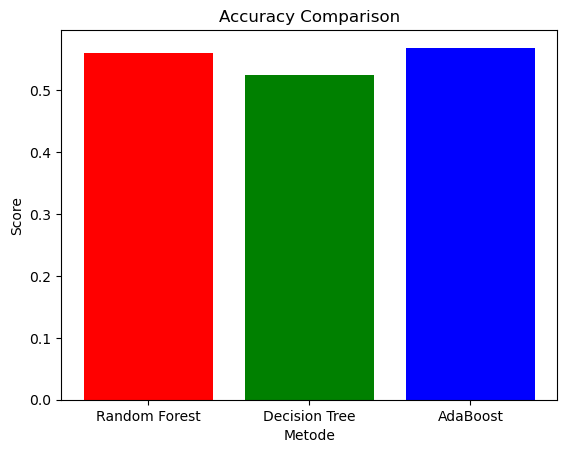

In [62]:
acc_rf = accuracy_score(y_test, rf_best_model_eval)
acc_dt = accuracy_score(y_test, dt_best_model_eval)
acc_ab = accuracy_score(y_test, adaboost_best_model_eval)

model_names = ["Random Forest", "Decision Tree", "AdaBoost"]
accuracy = [acc_rf, acc_dt, acc_ab]
x = np.arange(len(model_names))
plt.bar(x, accuracy, label = "Accuracy", color = ["red", "green", "blue"])
plt.xlabel("Metode")
plt.ylabel("Score")
plt.title("Accuracy Comparison")
plt.xticks(x, model_names)
plt.show()

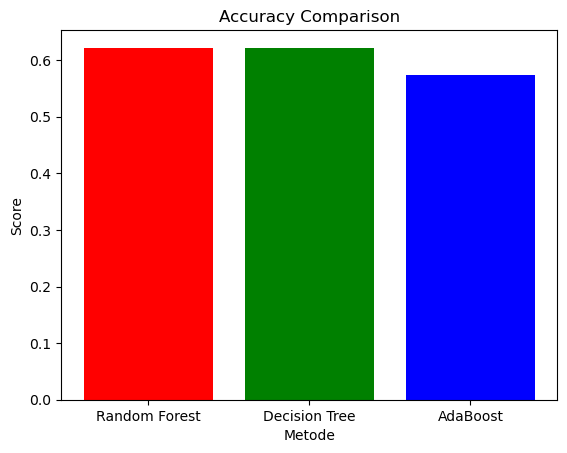

In [67]:
acc_rf = accuracy_score(y_test, rf_model_eval)
acc_dt = accuracy_score(y_test, dt_model_eval)
acc_ab = accuracy_score(y_test, adaboost_model_eval)

model_names = ["Random Forest", "Decision Tree", "AdaBoost"]
accuracy = [acc_rf, acc_dt, acc_ab]
x = np.arange(len(model_names))
plt.bar(x, accuracy, label = "Accuracy", color = ["red", "green", "blue"])
plt.xlabel("Metode")
plt.ylabel("Score")
plt.title("Accuracy Comparison")
plt.xticks(x, model_names)
plt.show()

f1-score Comparison

In [58]:
from sklearn.metrics import f1_score

(0.0, 1.0)

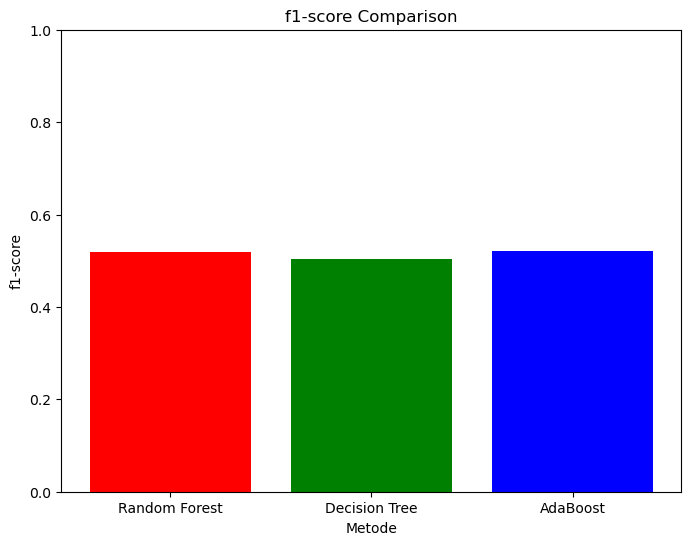

In [70]:
f1_rf = f1_score(y_test, rf_best_model_eval, average = "weighted")
f1_dt = f1_score(y_test, dt_best_model_eval, average = "weighted")
f1_ab = f1_score(y_test, adaboost_best_model_eval, average = "weighted")

f1_scores = [f1_rf, f1_dt, f1_ab]
methods = ["Random Forest", "Decision Tree", "AdaBoost"]

plt.figure(figsize=(8, 6))
plt.bar(methods, f1_scores, color = ["red", "green", "blue"])
plt.xlabel("Metode")
plt.ylabel("f1-score")
plt.title("f1-score Comparison")
plt.ylim(0, 1) 

(0.0, 1.0)

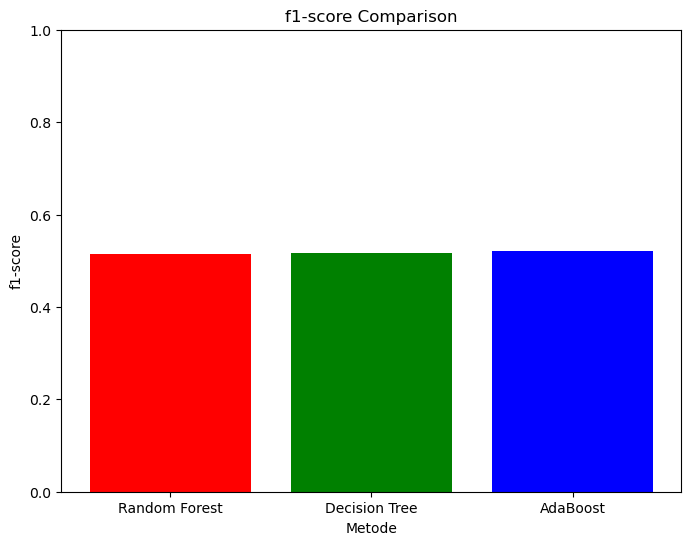

In [69]:
f1_rf = f1_score(y_test, rf_model_eval, average = "weighted")
f1_dt = f1_score(y_test, dt_model_eval, average = "weighted")
f1_ab = f1_score(y_test, adaboost_model_eval, average = "weighted")

f1_scores = [f1_rf, f1_dt, f1_ab]
methods = ["Random Forest", "Decision Tree", "AdaBoost"]

plt.figure(figsize=(8, 6))
plt.bar(methods, f1_scores, color = ["red", "green", "blue"])
plt.xlabel("Metode")
plt.ylabel("f1-score")
plt.title("f1-score Comparison")
plt.ylim(0, 1) 

Dengan menggunakan metode yang telah dicoba, belum ditemukan metode yang secara signifikan meningkatkan performa model dalam menangani dataset yang tidak seimbang.

Pada dataset ini, ketiga metode tidak memberikan perbedaan yang signifikan dalam hal precision, recall, dan f1-score antara kelas mayoritas (rating 5) dan kelas minoritas (rating 1). Ketiga metode yang telah digunakan belum mampu mengenali dan memprediksi kelas minoritas dengan baik. Hal ini dapat dilihat dari nilai recall, f1-score, dan akurasi yang rendah untuk kelas rating 1. Hal ini menunjukkan bahwa pada dataset yang tidak seimbang, belum ditemukan metode yang secara signifikan meningkatkan performa model. 

Untuk menangani kasus ini kemungkinan diperlukan metode lain seperti teknik sampling ulang, pengaturan threshold, atau penggunaan algoritma khusus untuk menangani dataset tersebut.